In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv('NCAA_data_4categories.csv')
df.head()

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,kenyon-martin-1,Kenyon Martin,Above Avg,cincinnati,142,292,0.587,0.586,0.494,0.581,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,aj-guyton-1,A.J. Guyton,Below Avg,indiana,403,52,0.541,0.455,0.249,0.790,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,jake-voskuhl-1,Jake Voskuhl,Below Avg,uconn,124,193,0.542,0.542,0.555,0.656,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,mike-smith-1,Mike Smith,Bust,louisiana monroe,147,42,0.507,0.428,0.357,0.769,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [4]:
y = df["class"]

In [6]:
X = df[['win_shares_per_40_minutes', 'field_goal_percentage', 'games_played', 'total_rebounds_per_40']]

In [7]:
#Split into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.998/0.294
k: 3, Train/Test Score: 0.618/0.290
k: 5, Train/Test Score: 0.548/0.318
k: 7, Train/Test Score: 0.501/0.294
k: 9, Train/Test Score: 0.487/0.341
k: 11, Train/Test Score: 0.466/0.350
k: 13, Train/Test Score: 0.466/0.332
k: 15, Train/Test Score: 0.469/0.322
k: 17, Train/Test Score: 0.454/0.332
k: 19, Train/Test Score: 0.452/0.336


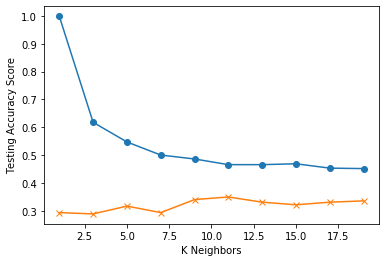

In [12]:
plt.plot(range(1, 20, 2), train_scores, marker = 'o')
plt.plot(range(1, 20, 2), test_scores, marker = "x")
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Test Acc: %3f' %knn.score(X_test, y_test))

k=11 Test Acc: 0.350467
